# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets
from ipywidgets import interact
from ipywidgets import interact_manual

# Import Data

In [2]:
data = pd.read_csv('E:/Downlload/Bitcoin-Price-Prediction-master/bitcoin.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389165
1,2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849
2,2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560102
3,2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736825
4,2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702624


In [17]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1872,2019-11-02,8291.172852,8397.126953,8282.598633,8349.874023,8349.874023,19021882025
1873,2019-11-03,8349.936523,8399.804688,8186.173828,8270.445313,8270.445313,18924326413
1874,2019-11-04,8270.670898,8541.590820,8259.809570,8458.521484,8458.521484,23517560012
1875,2019-11-05,8458.875000,8540.323242,8359.278320,8436.573242,8436.573242,23658103729
1876,2019-11-06,8435.071289,8512.726563,8406.735352,8456.394531,8456.394531,20898606220


In [18]:
data.shape

(1877, 7)

# Exploratory Data Analysis

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1877 entries, 0 to 1876
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1877 non-null   object 
 1   Open       1877 non-null   float64
 2   High       1877 non-null   float64
 3   Low        1877 non-null   float64
 4   Close      1877 non-null   float64
 5   Adj Close  1877 non-null   float64
 6   Volume     1877 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 102.8+ KB


In [20]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [21]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# Inferential Statistics

In [23]:
x = data.describe()

In [25]:
x = data.corr()

In [26]:
x = data.cov()
x.style.bar(color = 'gold', align = 'mid')

,Open,High,Low,Close,Adj Close,Volume
Open,11475741.690472,11842264.166148,11009896.757403,11452487.260161,11452487.260161,15906146097813.322266
High,11842264.166148,12250115.141358,11370654.257386,11850211.705606,11850211.705606,16484925586170.115234
Low,11009896.757403,11370654.257386,10603270.546356,11021329.441767,11021329.441767,15291482908332.144531
Close,11452487.260161,11850211.705606,11021329.441767,11486602.135265,11486602.135265,15942869198168.972656
Adj Close,11452487.260161,11850211.705606,11021329.441767,11486602.135265,11486602.135265,15942869198168.972656
Volume,15906146097813.322266,16484925586170.115234,15291482908332.144531,15942869198168.972656,15942869198168.972656,35921633666763468800.000000


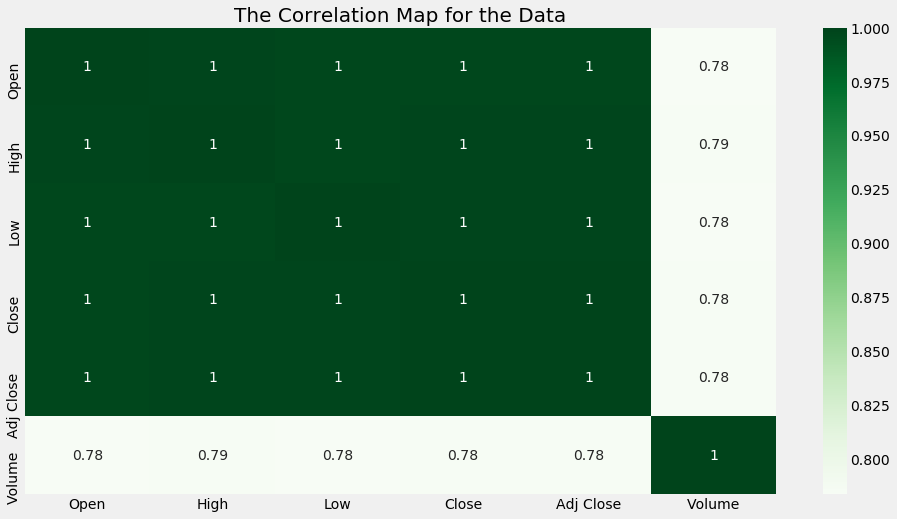

In [30]:
plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('fivethirtyeight')

sns.heatmap(data.corr(),
            cmap = 'Greens',
            annot = True)
plt.title('The Correlation Map for the Data', fontsize = 20)
plt.show()

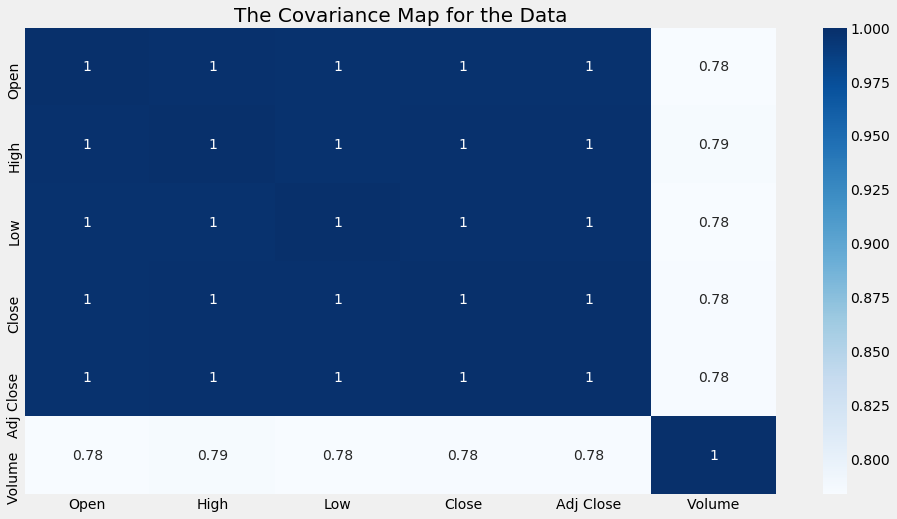

In [31]:
plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('fivethirtyeight')

sns.heatmap(data.corr(),
            cmap = 'Blues',
            annot = True)
plt.title('The Covariance Map for the Data', fontsize = 20)
plt.show()

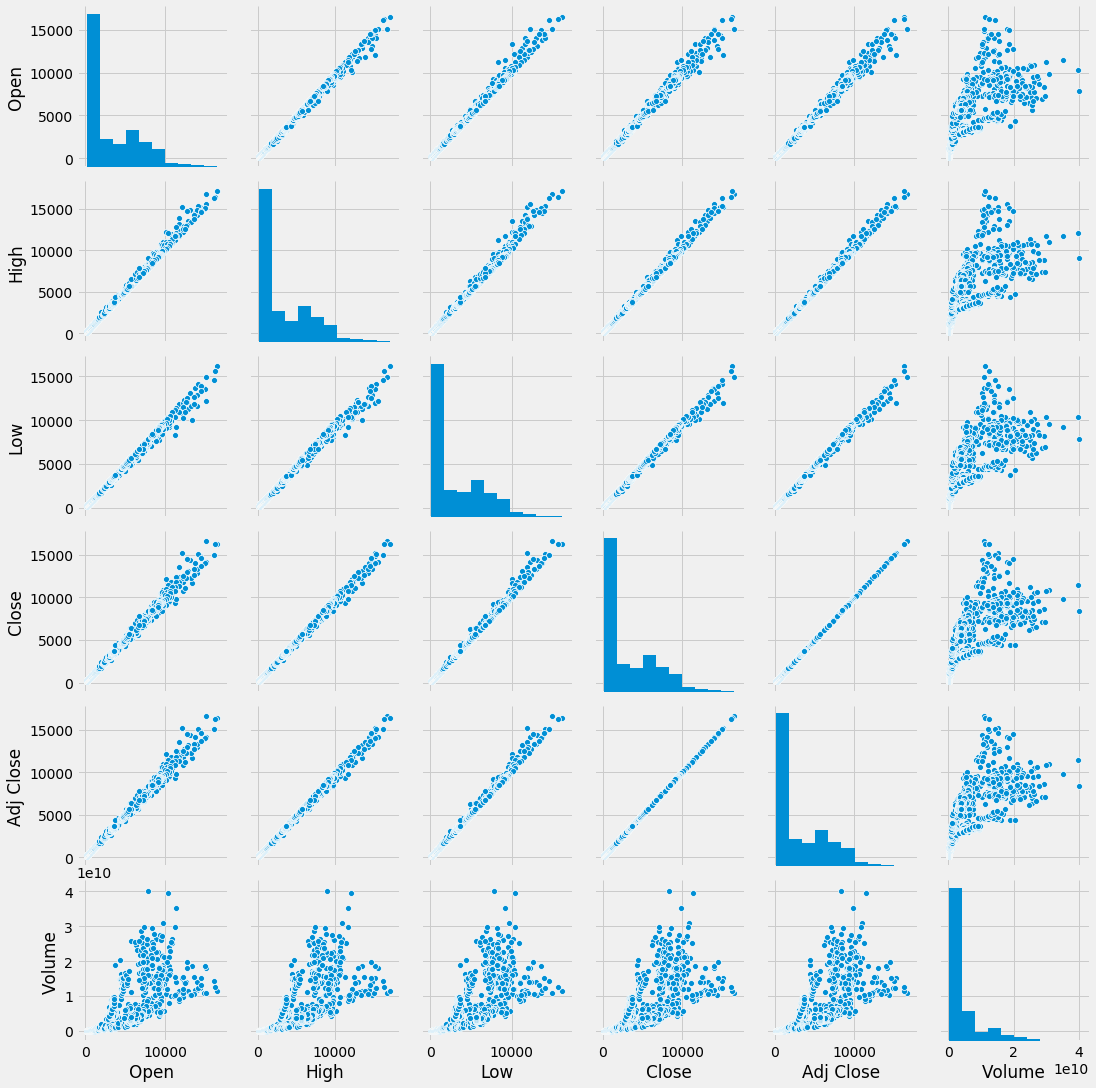

In [32]:
sns.pairplot(data)
plt.show()

Target looks like regression


C:\Users\DELL\anaconda3\lib\site-packages\dabl\plot\utils.py:621: UserWarning: Dropped 2 outliers in column Volume.
  int(dropped), series.name), UserWarning)


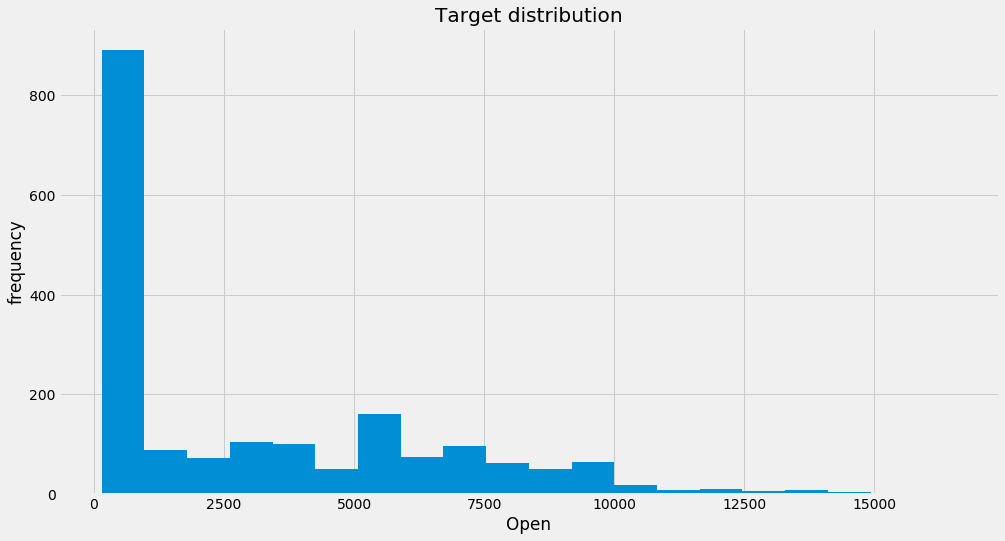

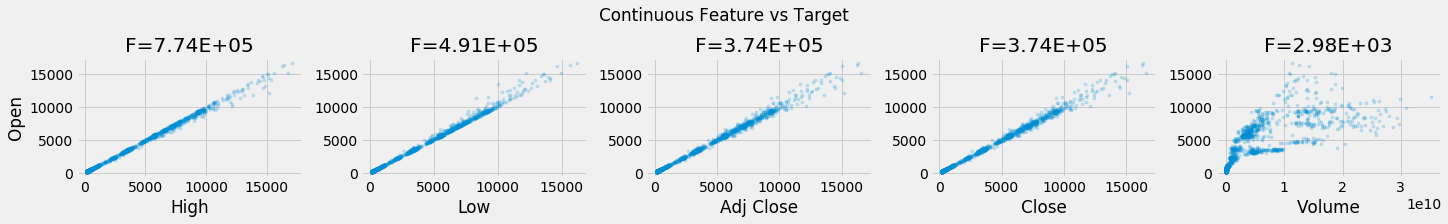

In [34]:
import dabl
dabl.plot(data, target_col = 'Open')

In [35]:
# lets convert the date variable into a datetime object
data['Date'] = pd.to_datetime(data['Date'])

# lets check the datatype of the date column now
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

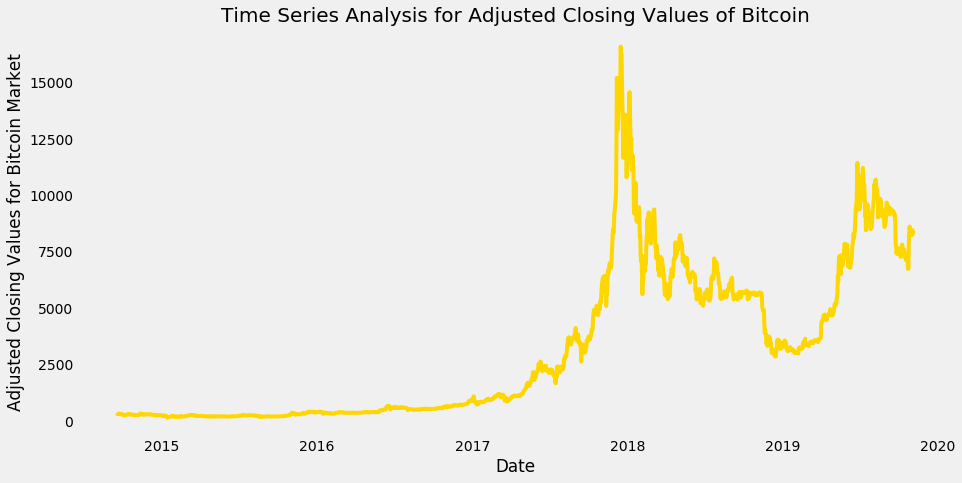

In [38]:
plt.rcParams['figure.figsize'] = (14, 7)
plt.style.use('fivethirtyeight')

sns.lineplot(data['Date'],
             data['Adj Close'],
             color = 'gold')
plt.title('Time Series Analysis for Adjusted Closing Values of Bitcoin', fontsize = 20)
plt.xlabel('Date')
plt.grid()
plt.ylabel('Adjusted Closing Values for Bitcoin Market')
plt.show()

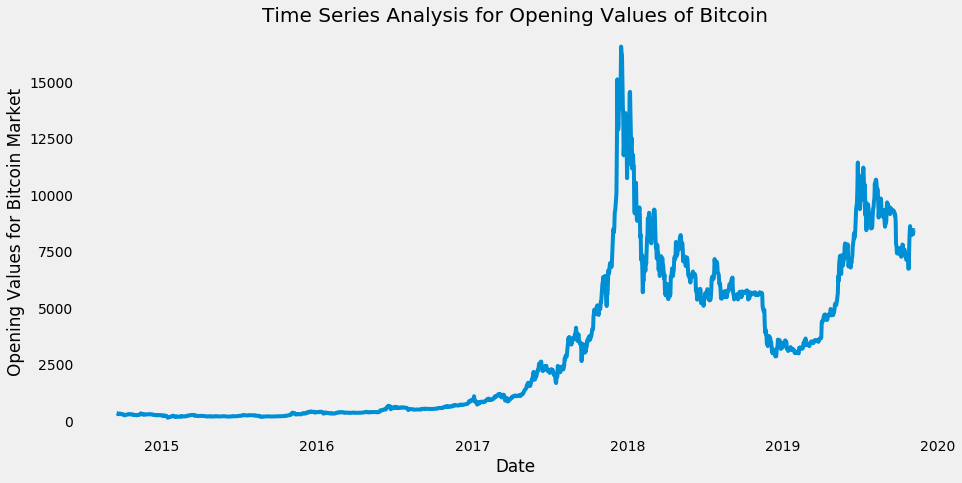

In [39]:
plt.rcParams['figure.figsize'] = (14, 7)
plt.style.use('fivethirtyeight')

sns.lineplot(data['Date'], data['Open'])
plt.title('Time Series Analysis for Opening Values of Bitcoin', fontsize = 20)
plt.xlabel('Date')
plt.grid()
plt.ylabel('Opening Values for Bitcoin Market')
plt.show()

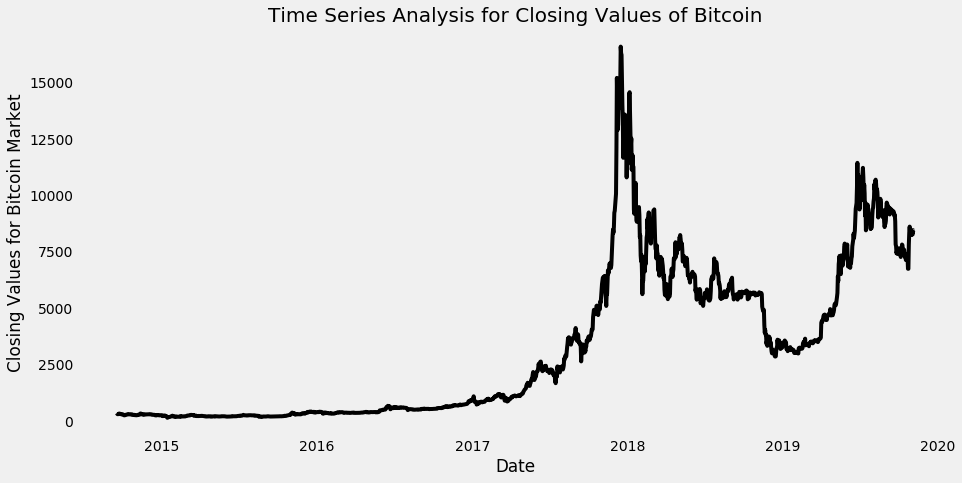

In [40]:
plt.rcParams['figure.figsize'] = (14, 7)
plt.style.use('fivethirtyeight')

sns.lineplot(data['Date'],
             data['Close'],
             color = 'black')
plt.title('Time Series Analysis for Closing Values of Bitcoin', fontsize = 20)
plt.xlabel('Date')
plt.grid()
plt.ylabel('Closing Values for Bitcoin Market')
plt.show()

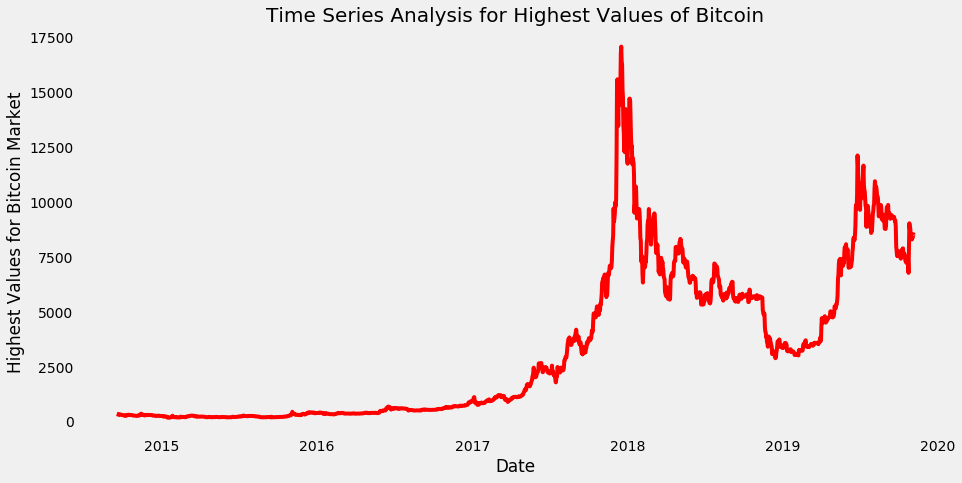

In [41]:
plt.rcParams['figure.figsize'] = (14, 7)
plt.style.use('fivethirtyeight')

sns.lineplot(data['Date'],
             data['High'],
             color = 'red')
plt.title('Time Series Analysis for Highest Values of Bitcoin', fontsize = 20)
plt.xlabel('Date')
plt.grid()
plt.ylabel('Highest Values for Bitcoin Market')
plt.show()

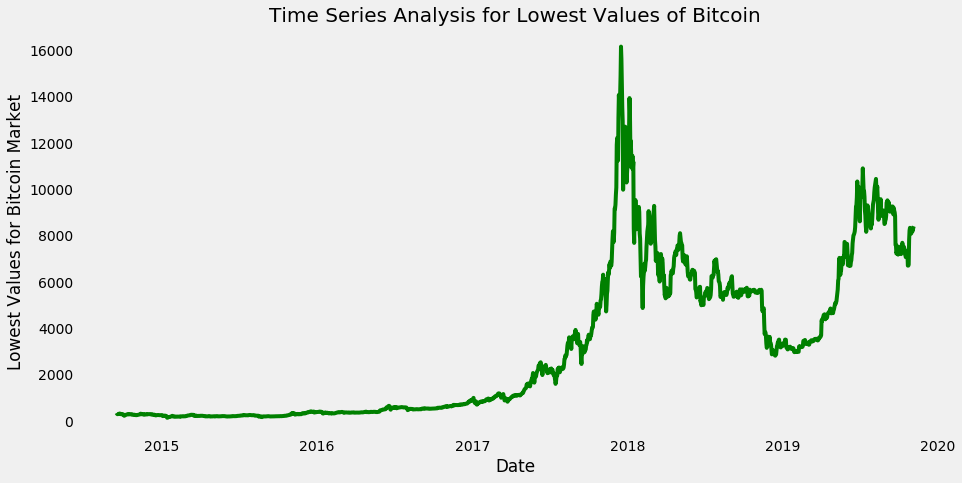

In [42]:
plt.rcParams['figure.figsize'] = (14, 7)
plt.style.use('fivethirtyeight')

sns.lineplot(data['Date'],
             data['Low'],
             color = 'green')
plt.title('Time Series Analysis for Lowest Values of Bitcoin', fontsize = 20)
plt.xlabel('Date')
plt.grid()
plt.ylabel('Lowest Values for Bitcoin Market')
plt.show()

In [40]:
plt.rcParams['figure.figsize'] = (14, 7)
plt.style.use('fivethirtyeight')

@interact_manual
def check(column = 'Date',
          column2 = ['Open',
                     'Close',
                     'High',
                     'Low',
                     'Adj_Close'],
        colors = ['black','red','green','blue']):
    sns.lineplot(data[column],
                 data[column2],
                 color = colors)
    plt.show()

interactive(children=(Text(value='Date', description='column'), Dropdown(description='column2', options=('Open…

# Feature Engineering

In [41]:
data['Daily Lag'] = data['Close'].shift(1)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Lag
0,2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389165,NaN
1,2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849,355.957367
2,2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560102,328.539368
3,2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736825,307.761139
4,2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702624,318.758972


In [42]:
data['Daily Returns'] = (data['Daily Lag']/data['Close']) -1
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Lag,Daily Returns
0,2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389165,NaN,NaN
1,2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849,355.957367,0.083454
2,2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560102,328.539368,0.067514
3,2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736825,307.761139,-0.034502
4,2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702624,318.758972,0.026161


# Checking Distributions

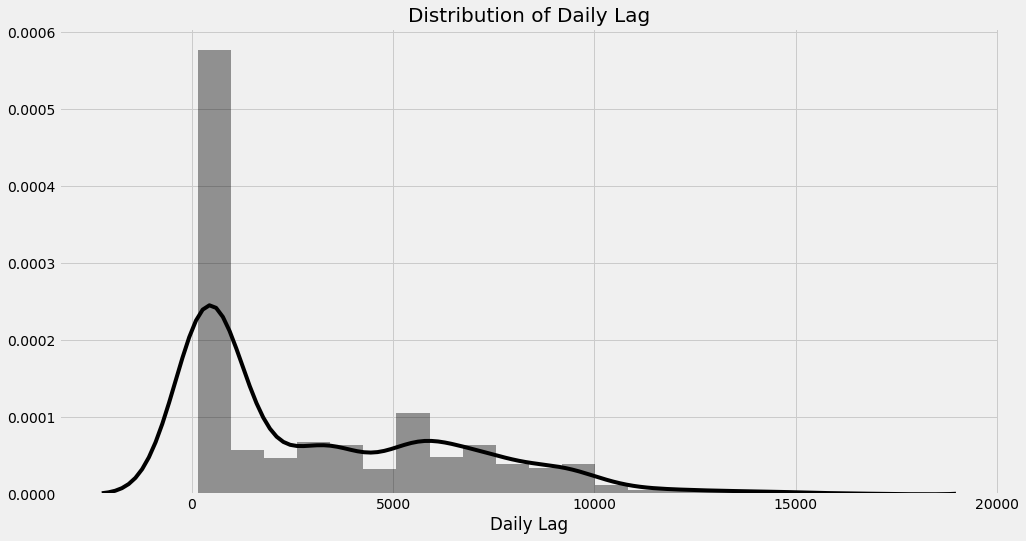

In [43]:
plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('fivethirtyeight')

sns.distplot(data['Daily Lag'],
             color = 'black')
plt.title('Distribution of Daily Lag', fontsize = 20)
plt.show()

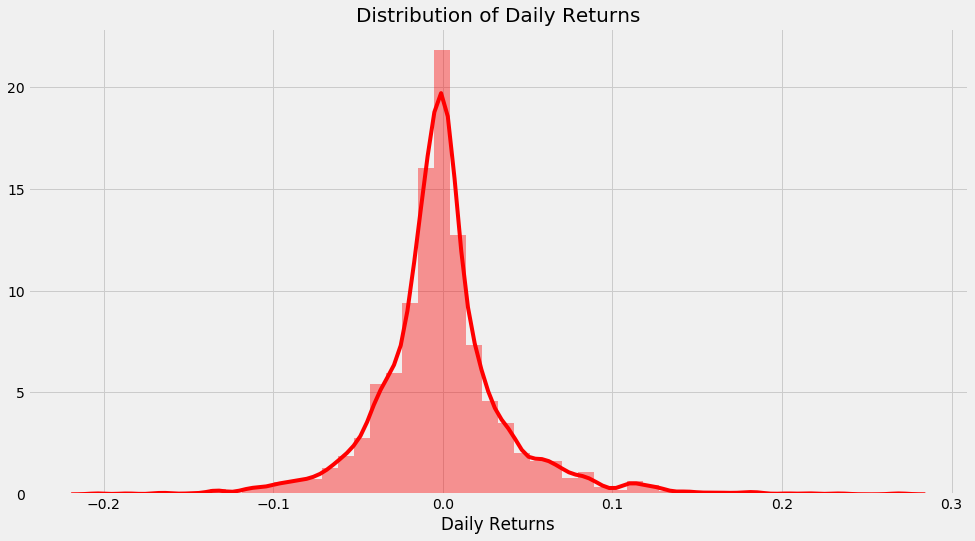

In [44]:
plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('fivethirtyeight')

sns.distplot(data['Daily Returns'],
             color = 'red')
plt.title('Distribution of Daily Returns', fontsize = 20)
plt.show()

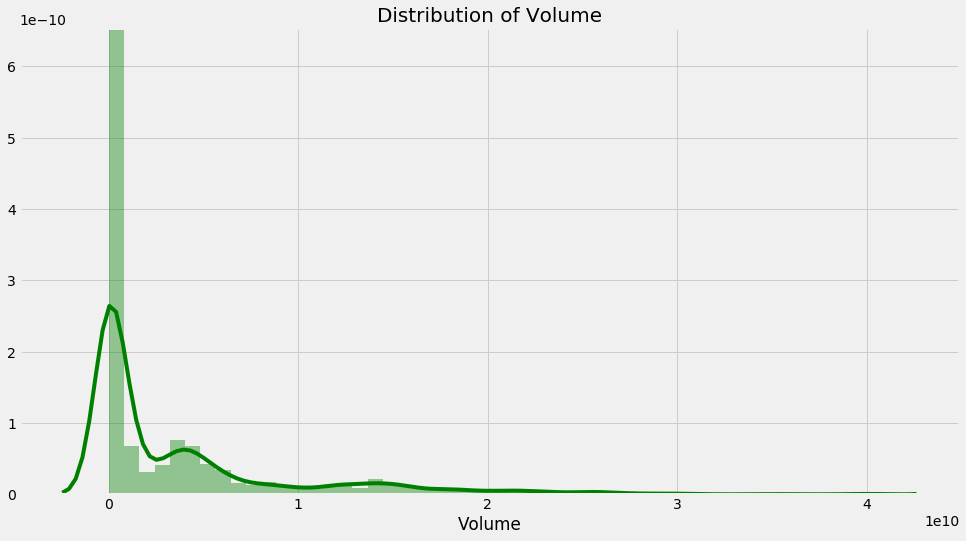

In [49]:
plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('fivethirtyeight')

sns.distplot(data['Volume'],
             color = 'green')
plt.title('Distribution of Volume', fontsize = 20)
plt.show()

In [50]:
mean = data['Daily Returns'].mean()
std = data['Daily Returns'].std()
print('Mean for Daily Returns :', mean)
print('Standard Deviation for Daily Returns :', std)
mean_lag = data['Daily Returns'].mean()
std_lag = data['Daily Returns'].std()
print('Mean for Daily Lag :', mean_lag)
print('Standard Deviation for Daily Lag :', std_lag)

Mean for Daily Returns : -0.0009202219778351076
Standard Deviation for Daily Returns : 0.03941675903822447
Mean for Daily Lag : -0.0009202219778351076
Standard Deviation for Daily Lag : 0.03941675903822447


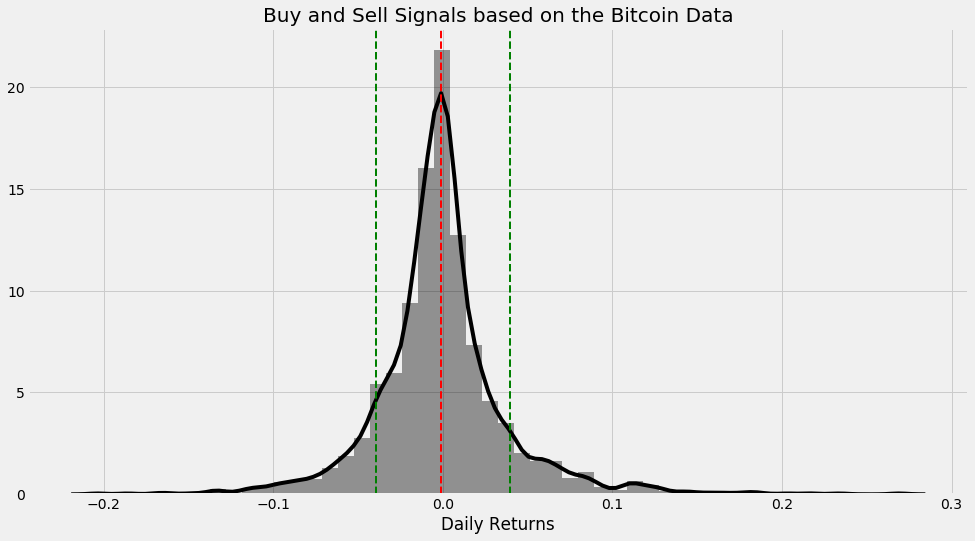

In [51]:
sns.distplot(data['Daily Returns'],
              color = 'black')
plt.axvline(mean,color='red',linestyle='dashed',linewidth=2)

#to plot the std line we plot both the positive and negative values 
plt.axvline(std,color='g',linestyle='dashed',linewidth=2)
plt.axvline(-std,color='g',linestyle='dashed',linewidth=2)
plt.title('Buy and Sell Signals based on the Bitcoin Data', fontsize = 20)
plt.show()

In [52]:
print("Kurtosis Values for Daily Lags : ", data['Daily Lag'].kurtosis())
print("Kurtosis Values for Daily Returns :", data['Daily Returns'].kurtosis())

Kurtosis Values for Daily Lags :  0.2888694715340234
Kurtosis Values for Daily Returns : 5.770034068011833


# Modelling

In [8]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(data,
                                         test_size = 0.05, 
                                         random_state = 0)

# printing the sizes of the training and testing datasets
print("Shape of Train Data :", data_train.shape)
print("Shape of Test Data :", data_test.shape)

Shape of Train Data : (1783, 7)
Shape of Test Data : (94, 7)


In [9]:
training_data = data_train.iloc[:, 1:2]

# lets check the shape of the training data
print("Shape of the Training Data: ", training_data.shape)

Shape of the Training Data:  (1783, 1)


In [10]:
training_data.head()

,Open
1025,2210.763184
1038,2441.012939
434,300.737671
596,388.816254
1591,3188.943848


# Feature Scaling

In [11]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler(feature_range = (0, 1))
training_data = mm.fit_transform(training_data)

# lets check the head of the training data
training_data

array([[0.12547858],
       [0.13949922],
       [0.00917104],
       ...,
       [0.21207839],
       [0.01393536],
       [0.02492356]])

In [12]:
x_train = training_data[0:1782]
y_train = training_data[1:1783]

print(x_train.shape)
print(y_train.shape)

(1782, 1)
(1782, 1)


In [13]:
x_train = np.reshape(x_train, (1782, 1, 1))

print(x_train.shape)

(1782, 1, 1)


In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.
C:\Users\DELL\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\DELL\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\DELL\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\DELL\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529

In [15]:
model = Sequential()

# adding the input layer and the LSTM layer
model.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# adding the output layer
model.add(Dense(units = 1))

# compiling the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# fitting the RNN to the training data
model.fit(x_train, y_train, batch_size = 32, epochs = 200)

Instructions for updating:
Use tf.cast instead.
Epoch 1/200
1782/1782 [==============================] - 0s 178us/step - loss: 0.3783
Epoch 2/200
1782/1782 [==============================] - 0s 40us/step - loss: 0.2351
Epoch 3/200
1782/1782 [==============================] - 0s 41us/step - loss: 0.1463
Epoch 4/200
1782/1782 [==============================] - 0s 39us/step - loss: 0.0946
Epoch 5/200
1782/1782 [==============================] - 0s 42us/step - loss: 0.0669
Epoch 6/200
1782/1782 [==============================] - 0s 42us/step - loss: 0.0532
Epoch 7/200
1782/1782 [==============================] - 0s 40us/step - loss: 0.0470
Epoch 8/200
1782/1782 [==============================] - 0s 39us/step - loss: 0.0444
Epoch 9/200
1782/1782 [==============================] - 0s 39us/step - loss: 0.0435
Epoch 10/200
1782/1782 [==============================] - 0s 40us/step - loss: 0.0431
Epoch 11/200
1782/1782 [==============================] - 0s 42us/step - loss: 0.0430
Epoch 12/200
1

In [16]:
real_bitcoin_price = data_test.iloc[:,1:2]
real_bitcoin_price.head()

,Open
994,2546.259521
124,182.949203
217,219.430008
1423,5702.377441
1467,5711.379395


In [17]:
inputs = real_bitcoin_price
inputs = mm.transform(inputs)
inputs = np.reshape(inputs, (94, 1, 1))


predicted_bitcoin_price = model.predict(inputs)
predicted_bitcoin_price = mm.inverse_transform(predicted_bitcoin_price)

In [18]:
print(predicted_bitcoin_price.shape)
print(real_bitcoin_price.shape)

(94, 1)
(94, 1)


# ARIMA MODEL

In [20]:
test = pd.read_csv('E:\Downlload\Bitcoin-Price-Prediction-master\Test.csv', index_col = 'Date')
train = pd.read_csv('E:\Downlload\Bitcoin-Price-Prediction-master\Training.csv', index_col = 'Date')

# lets check the shape of the dataset
print("Shape of Test Dataset :", test.shape)
print("Shape of Train Dataset :", train.shape)

Shape of Test Dataset : (7, 6)
Shape of Train Dataset : (1556, 6)


In [21]:
train = train.sort_index()
train.index = pd.to_datetime(train.index)
train.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2014-04-01,457.00,495.34,457.00,478.38,"35,685,800","5,752,280,000"
2015-04-01,244.22,247.54,241.16,247.27,"22,877,200","3,420,100,000"
2016-04-01,416.76,418.17,415.83,417.96,"51,235,700","6,409,540,000"
2017-04-01,1071.71,1091.72,1061.09,1080.50,"289,634,000","17,413,000,000"
2014-04-02,479.14,495.05,431.27,437.14,"49,647,600","6,032,970,000"


In [22]:
test = test.sort_index()
test.index = pd.to_datetime(test.index)
test.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-08-01,2871.30,2921.35,2685.61,2718.26,"1,324,670,000","47,321,800,000"
2017-08-02,2727.13,2762.53,2668.59,2710.67,"1,094,950,000","44,950,800,000"
2017-08-03,2709.56,2813.31,2685.14,2804.73,"804,797,000","44,666,400,000"
2017-08-04,2806.93,2899.33,2743.72,2895.89,"1,002,120,000","46,276,200,000"
2017-08-05,2897.63,3290.01,2874.83,3252.91,"1,945,700,000","47,778,200,000"


In [23]:
train = train['Close']
train.head()

Date
2014-04-01     478.38
2015-04-01     247.27
2016-04-01     417.96
2017-04-01    1080.50
2014-04-02     437.14
Name: Close, dtype: float64

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


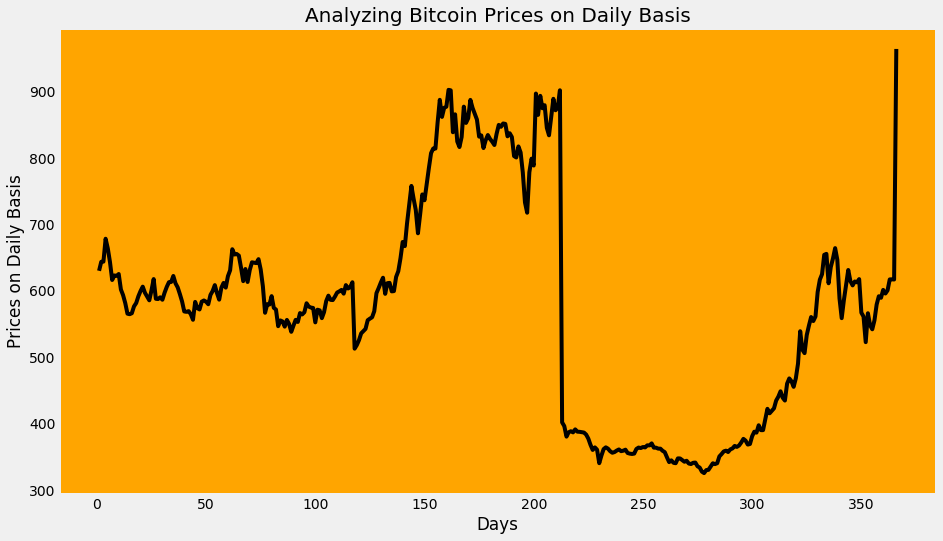

In [46]:
plt.rcParams["figure.figsize"] = 14,8
by_day = train.groupby(train.index.dayofyear).mean()
by_day.plot(color = 'black')
plt.title('Analyzing Bitcoin Prices on Daily Basis', fontsize = 20)
plt.ylabel('Prices on Daily Basis')
plt.xlabel('Days')
plt.grid()
ax = plt.axes()
# Setting the background color
ax.set_facecolor("orange")
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


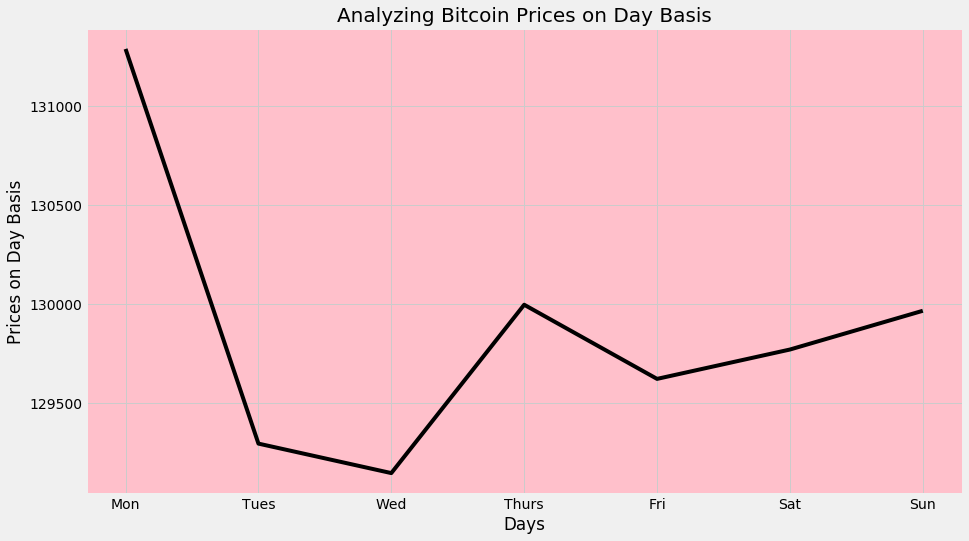

In [50]:
by_weekday = train.groupby(train.index.dayofweek).sum()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(color = 'black')
plt.title('Analyzing Bitcoin Prices on Day Basis', fontsize = 20)
plt.ylabel('Prices on Day Basis')
plt.xlabel('Days')
ax = plt.axes()
ax.set_facecolor("pink")
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


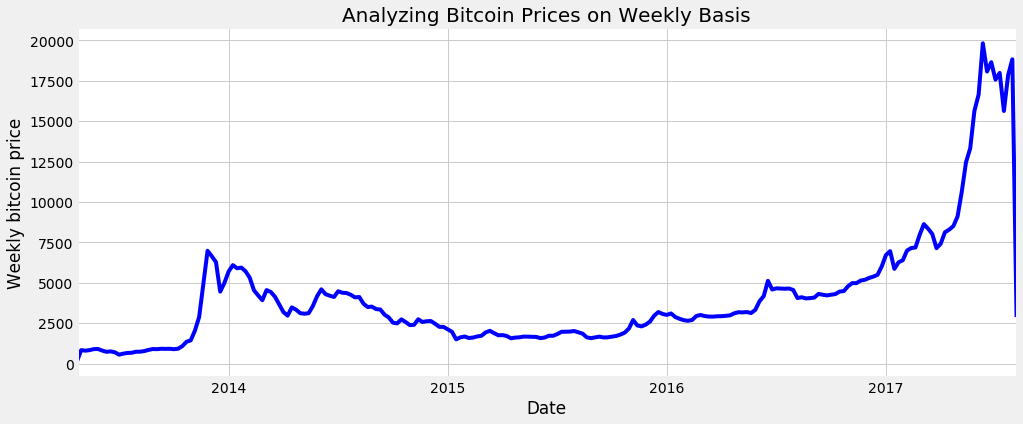

In [53]:
plt.rcParams['figure.figsize'] = (15, 6)
weekly = train.resample('W').sum()
weekly.plot(color = 'blue')
plt.ylabel('Weekly bitcoin price')
plt.title('Analyzing Bitcoin Prices on Weekly Basis', fontsize = 20)
ax = plt.axes()
ax.set_facecolor("white")
plt.show()

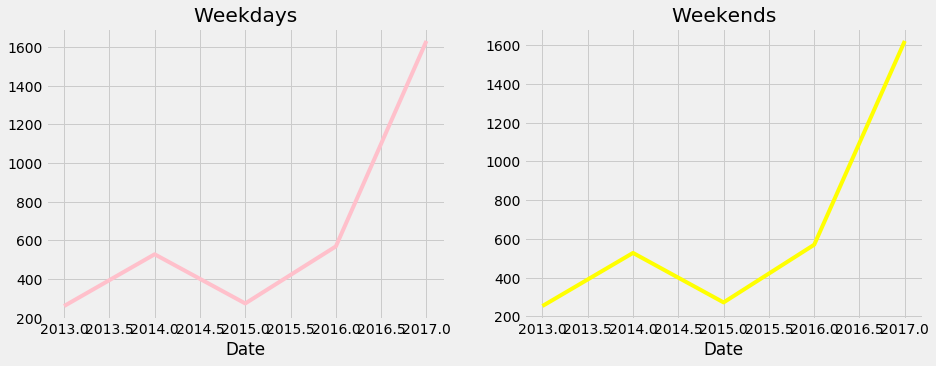

In [54]:
weekend = np.where(train.index.weekday < 5, 'Weekday', 'Weekend')
by_time = train.groupby([weekend, train.index.year]).mean()
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0],
                            title='Weekdays',
                            color = 'pink')
by_time.loc['Weekend'].plot(ax=ax[1],
                            title='Weekends',
                            color = 'yellow')
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


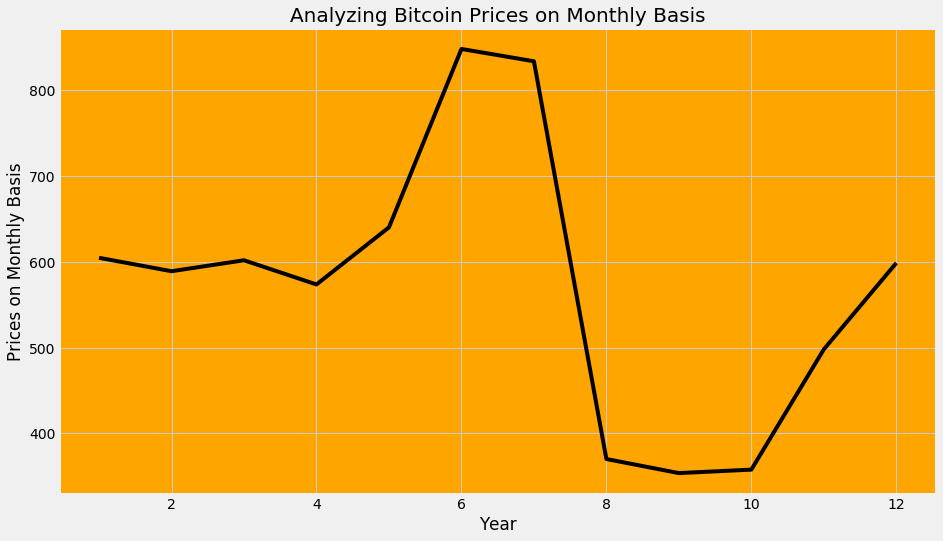

In [63]:
plt.rcParams["figure.figsize"] = 14,8
by_month = train.groupby(train.index.month).mean()
by_month.plot(color = 'black')
plt.title('Analyzing Bitcoin Prices on Monthly Basis', fontsize = 20)
plt.ylabel('Prices on Monthly Basis')
plt.xlabel('Year')
ax = plt.axes()
ax.set_facecolor("orange")
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


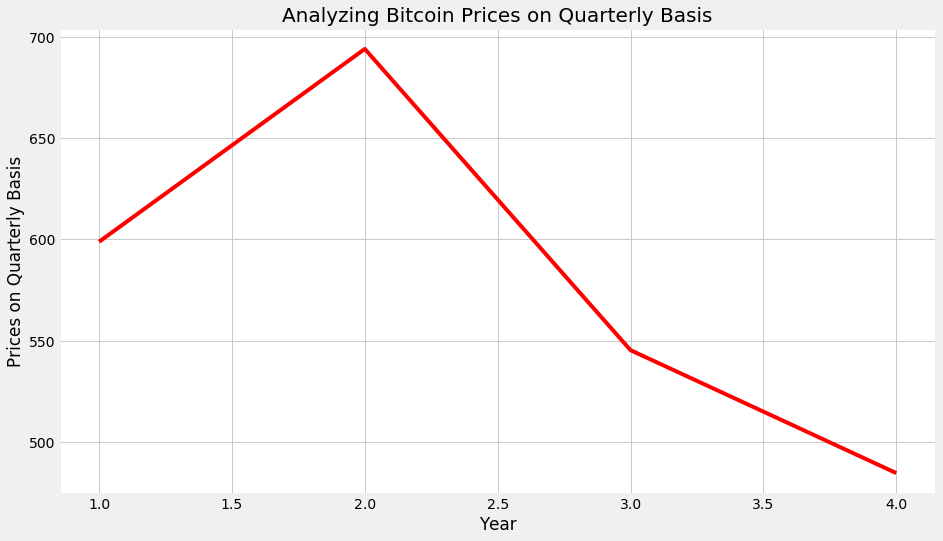

In [66]:
by_quarter = train.groupby(train.index.quarter).mean()
by_quarter.plot(color = 'red')
plt.title('Analyzing Bitcoin Prices on Quarterly Basis', fontsize = 20)
plt.ylabel('Prices on Quarterly Basis')
plt.xlabel('Year')
ax = plt.axes()
ax.set_facecolor("white")
plt.show()

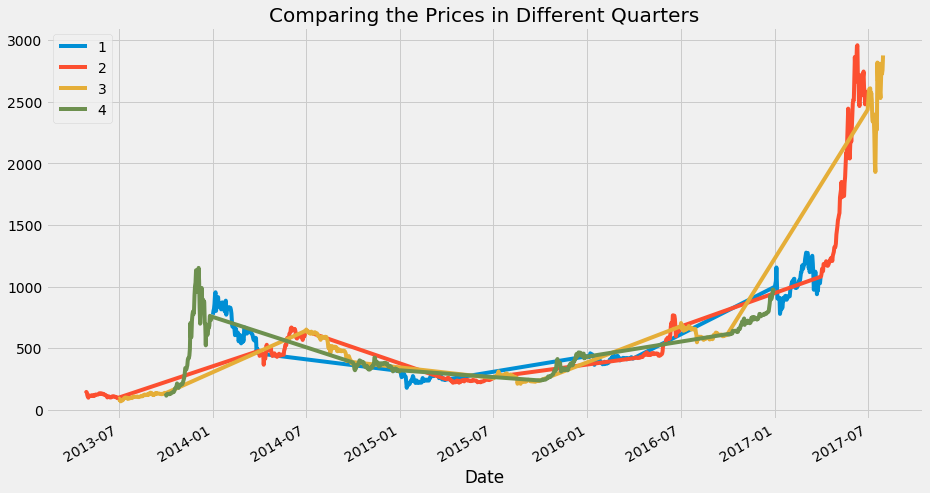

In [67]:
by_quarter = train.groupby(train.index.quarter)
by_quarter.plot()
plt.title('Comparing the Prices in Different Quarters', fontsize = 20)
plt.legend()
plt.show()

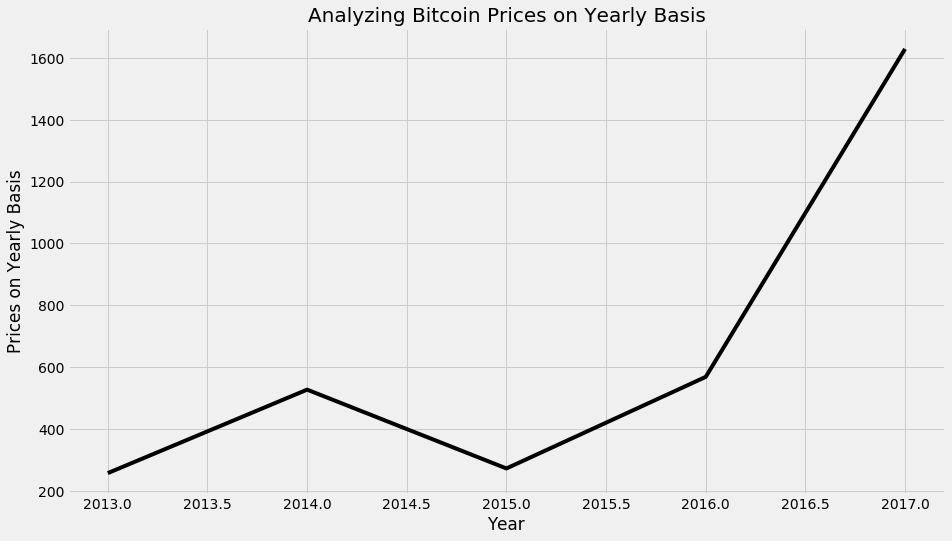

In [68]:
by_year = train.groupby(train.index.year).mean()
by_year.plot(color = 'black')
plt.title('Analyzing Bitcoin Prices on Yearly Basis', fontsize = 20)
plt.ylabel('Prices on Yearly Basis')
plt.xlabel('Year')
plt.show()

# Statistical Transformations

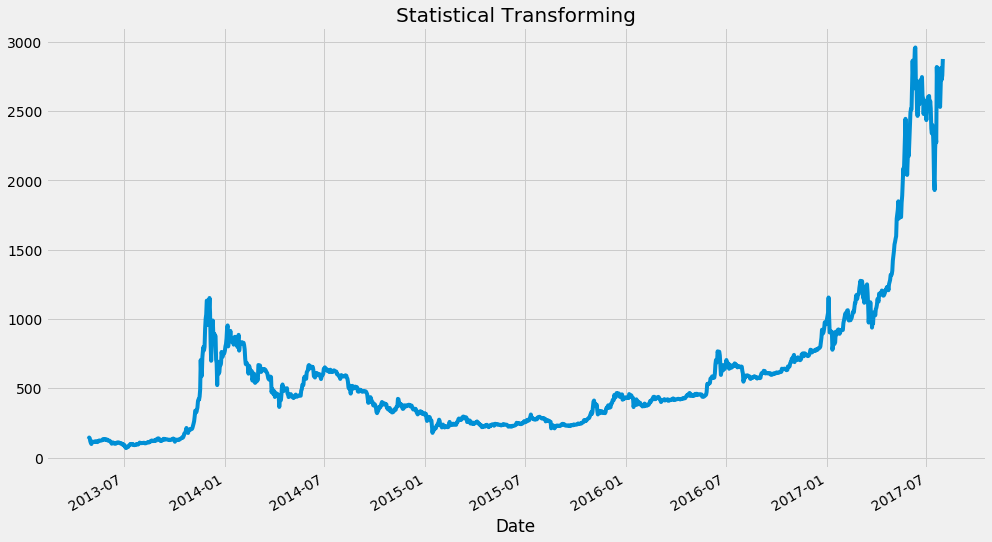

In [69]:
plt.rcParams['figure.figsize'] = (15, 9)
ts = train
ts.plot()
plt.title('Statistical Transforming', fontsize = 20)
plt.show()

In [70]:
ts = ts.sort_index()
ts

Date
2013-04-28     134.21
2013-04-29     144.54
2013-04-30     139.00
2013-05-01     116.99
2013-05-02     105.21
               ...   
2017-07-27    2671.78
2017-07-28    2809.01
2017-07-29    2726.45
2017-07-30    2757.18
2017-07-31    2875.34
Name: Close, Length: 1556, dtype: float64

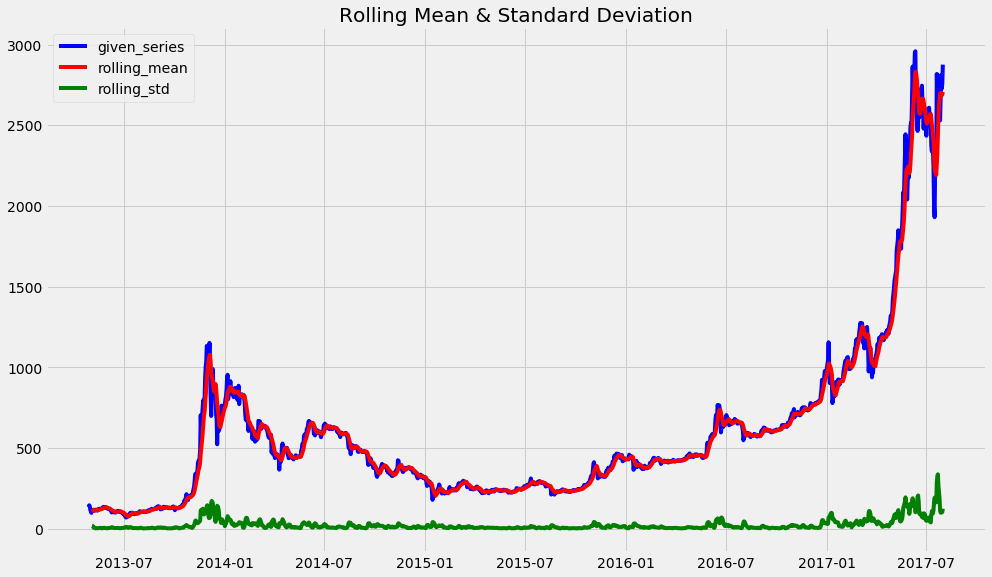

Results of Dickey-Fuller Test:
Test Statistic                    2.535589
p-value                           0.999060
#Lags Used                       24.000000
Number of Observations Used    1531.000000
Critical Value (1%)              -3.434628
Critical Value (5%)              -2.863430
Critical Value (10%)             -2.567776
dtype: float64


In [71]:
from statsmodels.tsa.stattools import adfuller
plt.style.use('fivethirtyeight')

def test_for_stationary(input_data):
    r_mean = input_data.rolling(window = 7,center=False).mean()
    r_std = input_data.rolling(window = 7,center=False).std()
    
    given = plt.plot(input_data, color = 'blue', label = 'given_series')
    rolling_mean = plt.plot(r_mean, color = 'red', label = 'rolling_mean')
    rolling_std = plt.plot(r_std, color ='green', label = 'rolling_std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
     #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(input_data)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used',
                                             'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

test_for_stationary(ts)

# Data Transformation to Eliminate the Trend

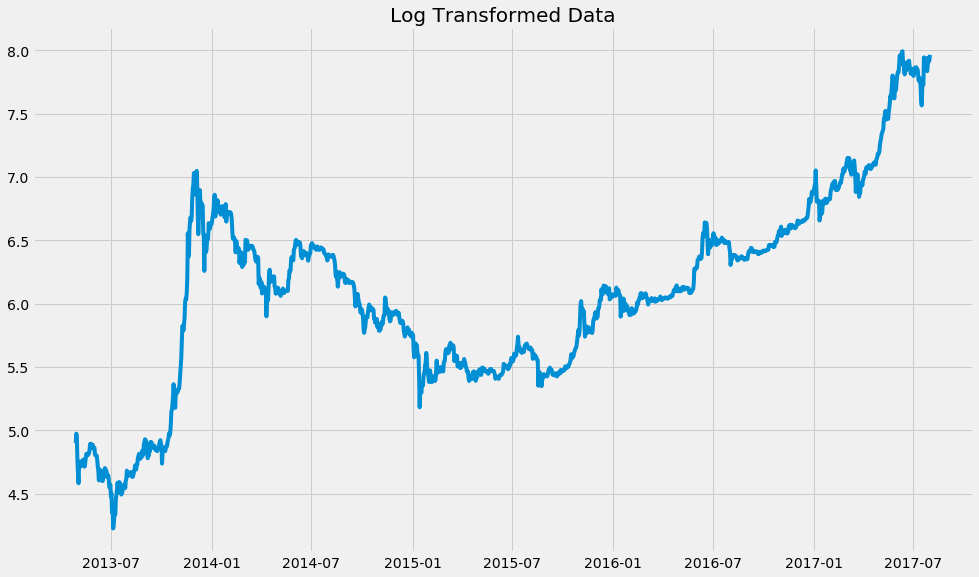

In [72]:
ts_logtransformed = np.log(ts)
plt.plot(ts_logtransformed)
plt.title('Log Transformed Data', fontsize = 20)
plt.show()

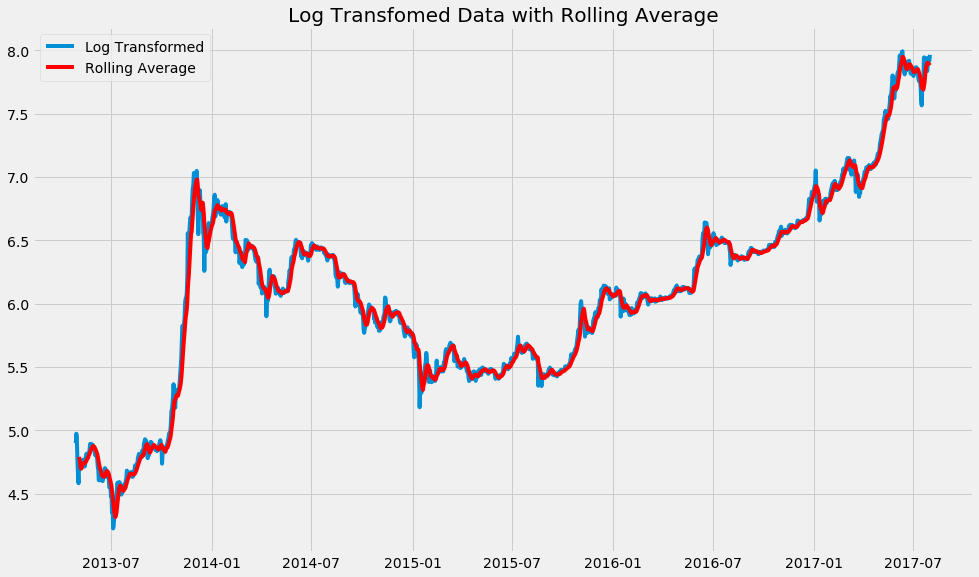

In [73]:
Rolling_average = ts_logtransformed.rolling(window = 7, center= False).mean()
plt.plot(ts_logtransformed, label = 'Log Transformed')
plt.plot(Rolling_average, color = 'red', label = 'Rolling Average')
plt.legend(loc = 'best')
plt.title('Log Transfomed Data with Rolling Average', fontsize = 20)
plt.show()

In [74]:
Rolling_average.head(10)

Date
2013-04-28         NaN
2013-04-29         NaN
2013-04-30         NaN
2013-05-01         NaN
2013-05-02         NaN
2013-05-03         NaN
2013-05-04    4.790121
2013-05-05    4.769180
2013-05-06    4.733125
2013-05-07    4.701632
Name: Close, dtype: float64

In [75]:
log_Rolling_difference = ts_logtransformed - Rolling_average
log_Rolling_difference.head(10)
log_Rolling_difference.tail(10)

Date
2017-07-22    0.151593
2017-07-23    0.073239
2017-07-24    0.051861
2017-07-25   -0.030130
2017-07-26   -0.063797
2017-07-27   -0.001463
2017-07-28    0.041254
2017-07-29    0.015741
2017-07-30    0.025554
2017-07-31    0.061402
Name: Close, dtype: float64

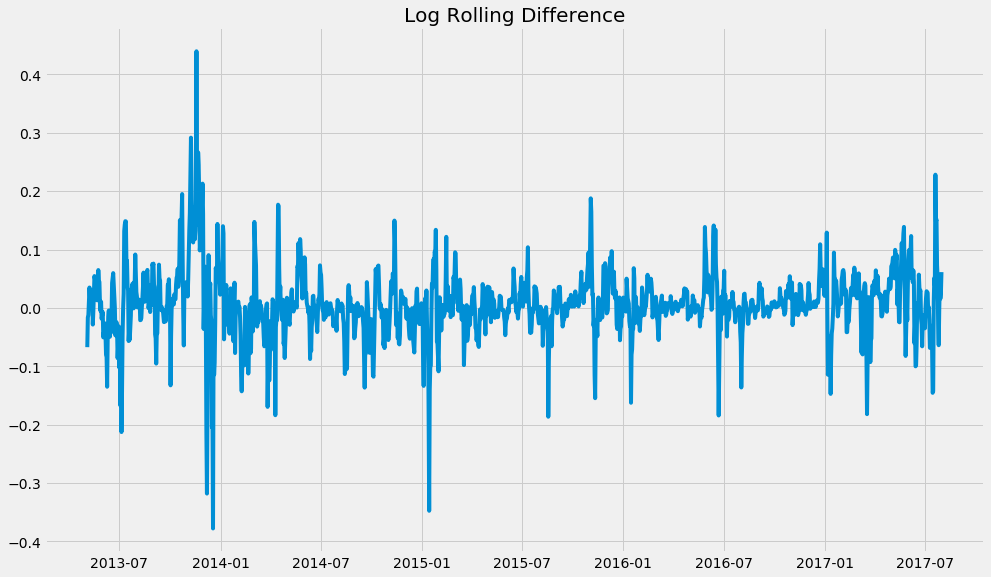

In [76]:
log_Rolling_difference.dropna(inplace=True)
plt.plot(log_Rolling_difference)
plt.title('Log Rolling Difference', fontsize = 20)
plt.show()

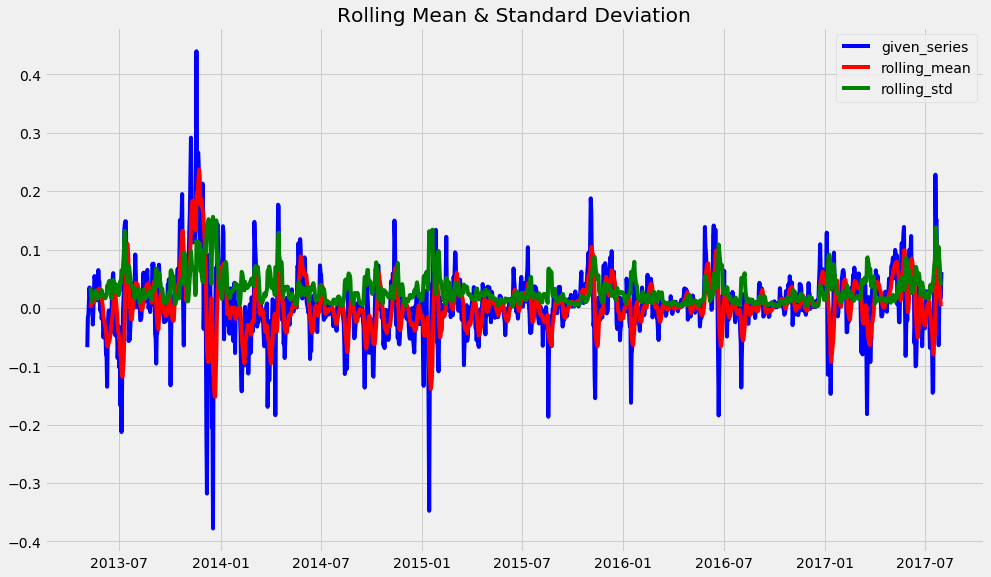

Results of Dickey-Fuller Test:
Test Statistic                -7.191326e+00
p-value                        2.499260e-10
#Lags Used                     2.200000e+01
Number of Observations Used    1.527000e+03
Critical Value (1%)           -3.434640e+00
Critical Value (5%)           -2.863435e+00
Critical Value (10%)          -2.567779e+00
dtype: float64


In [77]:
test_for_stationary(log_Rolling_difference)

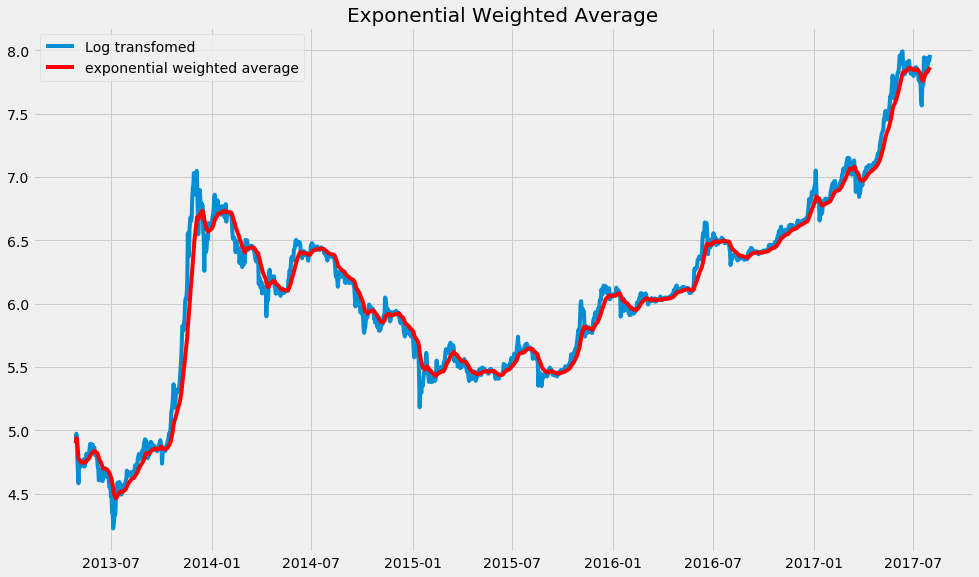

In [78]:
expwighted_avg = ts_logtransformed.ewm(halflife=7,min_periods=0,adjust=True,ignore_na=False).mean()
plt.plot(ts_logtransformed, label = 'Log transfomed')
plt.plot(expwighted_avg, color='red', label = 'exponential weighted average')
plt.legend(loc = 'best')
plt.title('Exponential Weighted Average', fontsize = 20)
plt.show()

In [79]:
expwighted_avg.head(10)

Date
2013-04-28    4.899406
2013-04-29    4.938315
2013-04-30    4.936906
2013-05-01    4.886513
2013-05-02    4.830850
2013-05-03    4.778564
2013-05-04    4.768079
2013-05-05    4.765448
2013-05-06    4.758372
2013-05-07    4.751720
Name: Close, dtype: float64

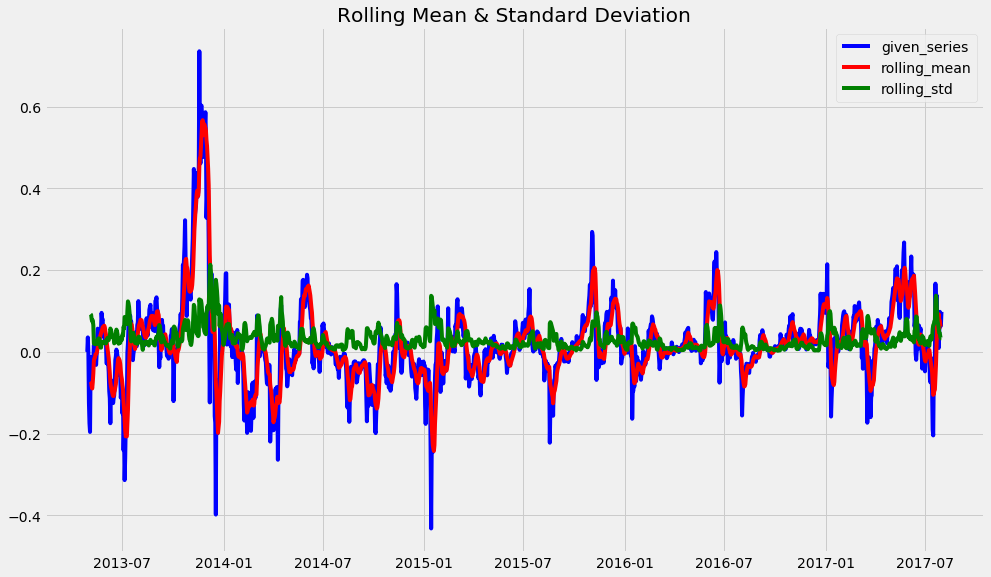

Results of Dickey-Fuller Test:
Test Statistic                   -5.442038
p-value                           0.000003
#Lags Used                       23.000000
Number of Observations Used    1532.000000
Critical Value (1%)              -3.434626
Critical Value (5%)              -2.863428
Critical Value (10%)             -2.567775
dtype: float64


In [80]:
log_expmovwt_diff = ts_logtransformed - expwighted_avg

test_for_stationary(log_expmovwt_diff)

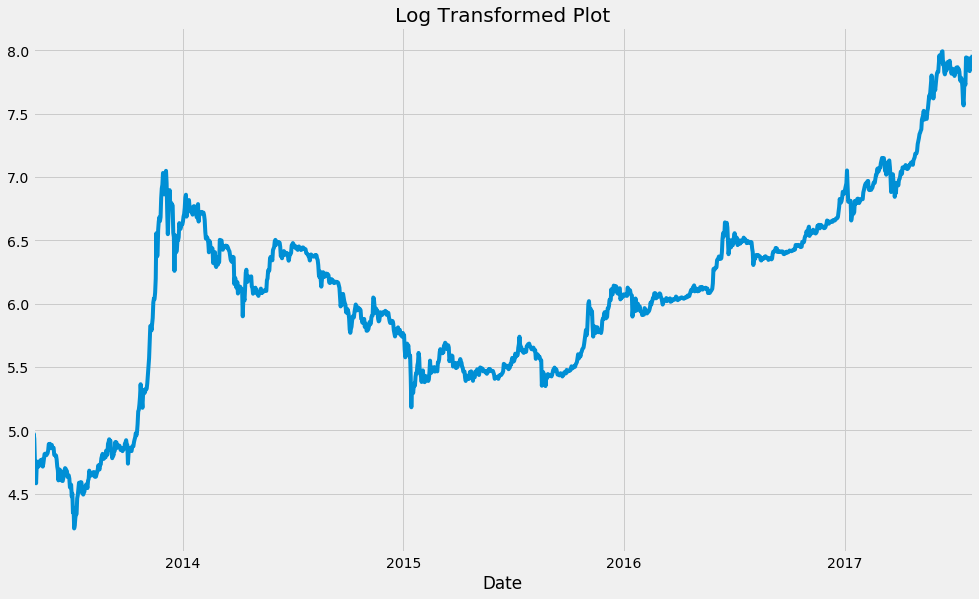

In [81]:
ts_logtransformed.plot()
plt.title('Log Transformed Plot', fontsize = 20)
plt.show()

# Seasonality Adjustment by Differencing

Date
2013-04-28         NaN
2013-04-29         NaN
2013-04-30         NaN
2013-05-01         NaN
2013-05-02         NaN
2013-05-03         NaN
2013-05-04         NaN
2013-05-05   -0.146592
2013-05-06   -0.252382
2013-05-07   -0.220449
Name: Close, dtype: float64

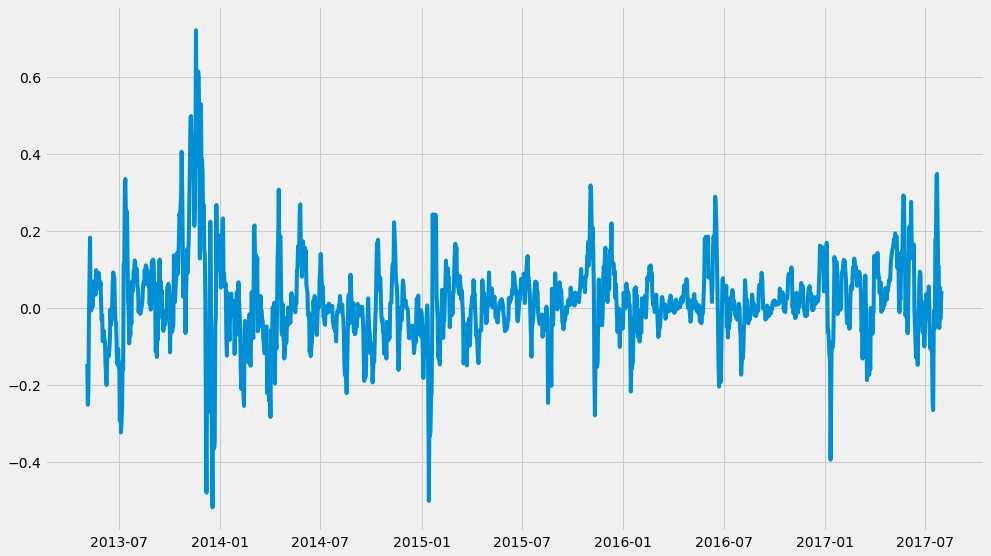

In [82]:
ts_diff_logtrans = ts_logtransformed -ts_logtransformed.shift(7)
plt.plot(ts_diff_logtrans)
ts_diff_logtrans.head(10)

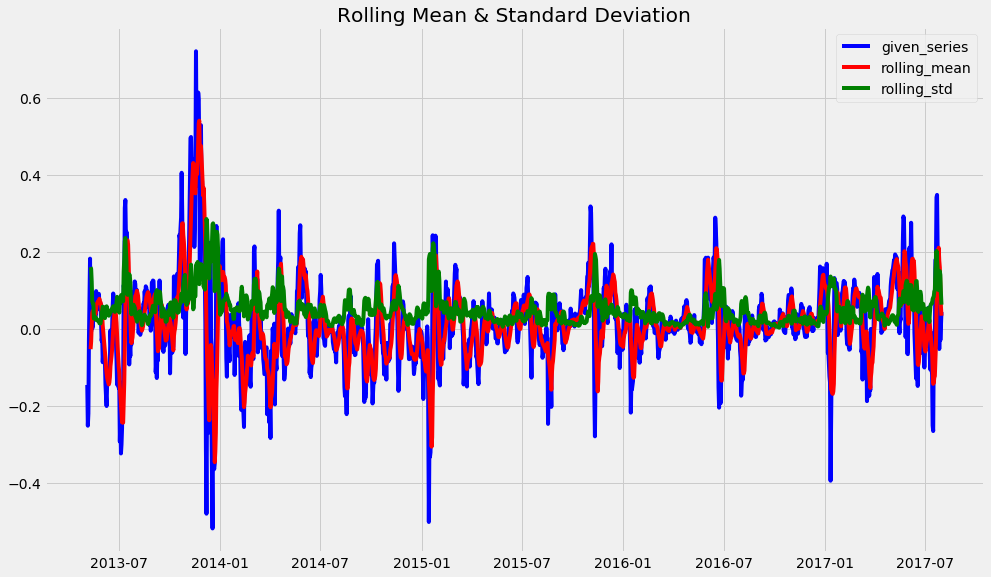

Results of Dickey-Fuller Test:
Test Statistic                -6.523574e+00
p-value                        1.027774e-08
#Lags Used                     2.300000e+01
Number of Observations Used    1.525000e+03
Critical Value (1%)           -3.434645e+00
Critical Value (5%)           -2.863437e+00
Critical Value (10%)          -2.567780e+00
dtype: float64


In [83]:
ts_diff_logtrans.dropna(inplace=True)
test_for_stationary(ts_diff_logtrans)

# Decomposition

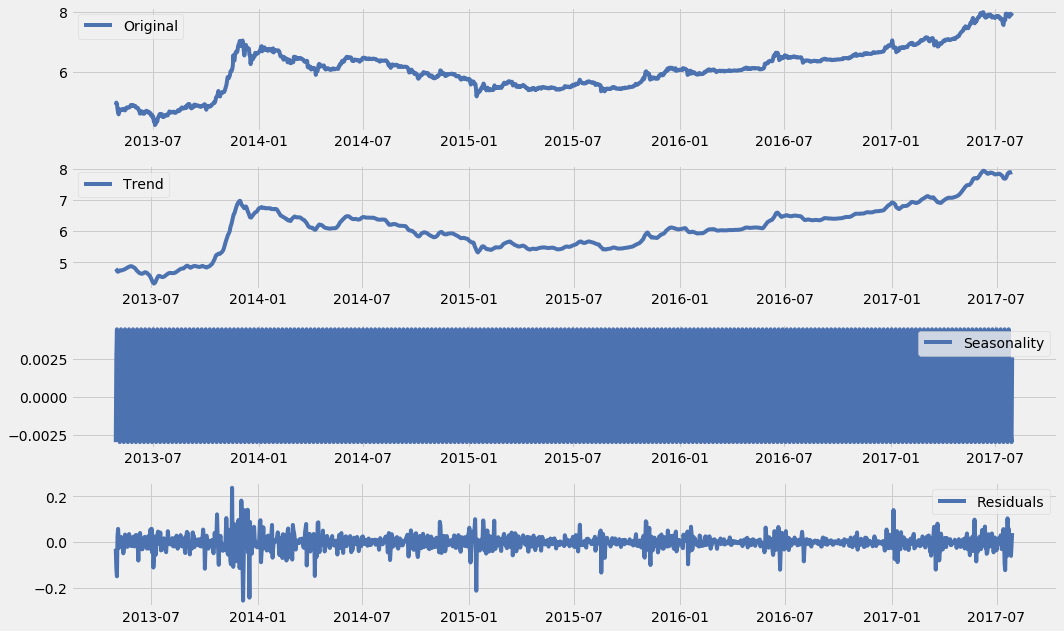

In [84]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.style.use('seaborn-deep')

decomposition = seasonal_decompose(ts_logtransformed)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_logtransformed, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

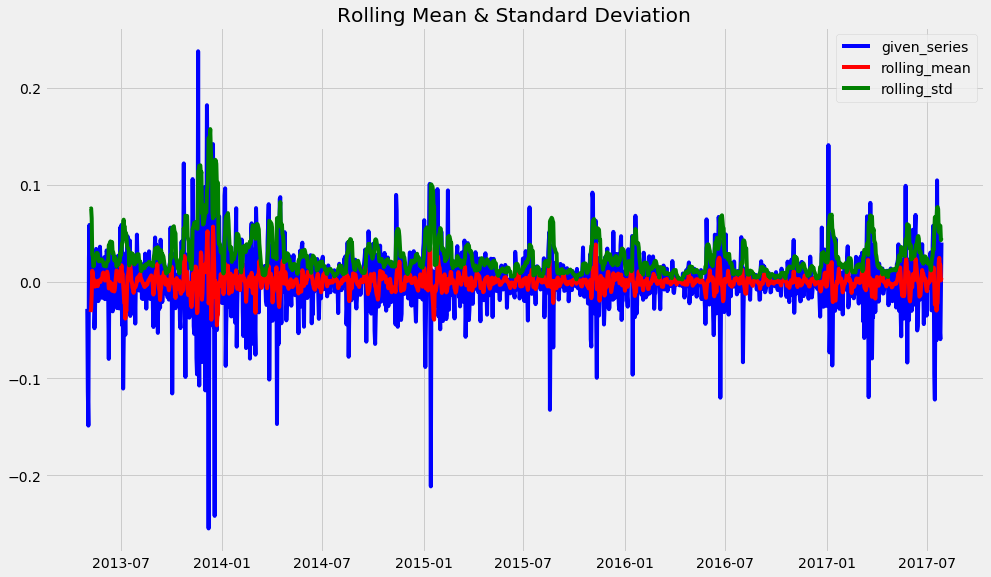

Results of Dickey-Fuller Test:
Test Statistic                -1.256779e+01
p-value                        2.035387e-23
#Lags Used                     2.300000e+01
Number of Observations Used    1.526000e+03
Critical Value (1%)           -3.434642e+00
Critical Value (5%)           -2.863436e+00
Critical Value (10%)          -2.567779e+00
dtype: float64


In [85]:
decomposed_TS = residual
decomposed_TS.dropna(inplace=True)
test_for_stationary(decomposed_TS)

In [87]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
lag_acf = acf(ts_diff_logtrans, nlags=30)
lag_pacf = pacf(ts_diff_logtrans, nlags=50, method='ols')

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


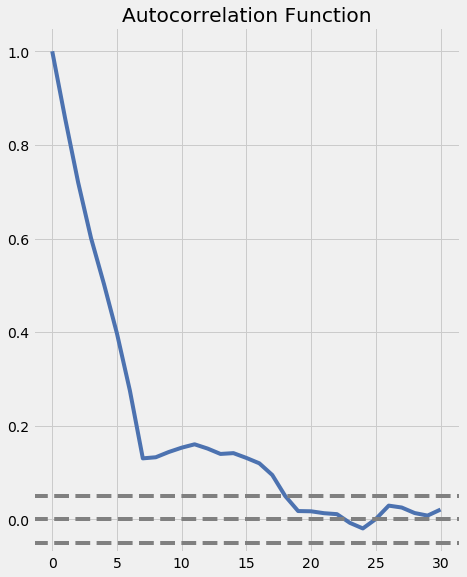

In [88]:
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff_logtrans)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff_logtrans)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()

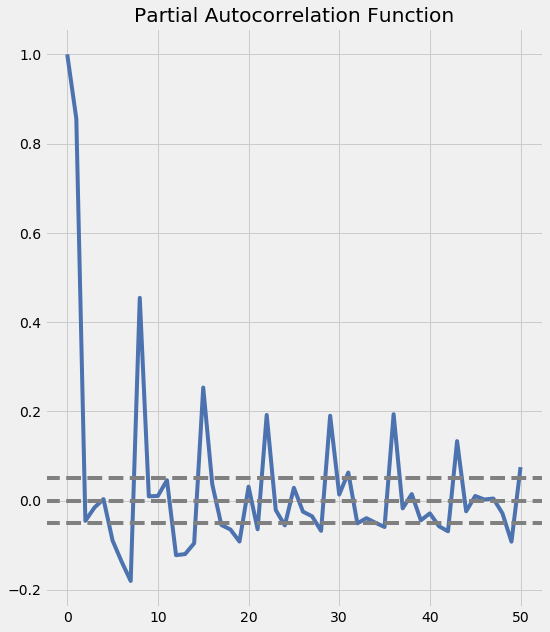

In [89]:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff_logtrans)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff_logtrans)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

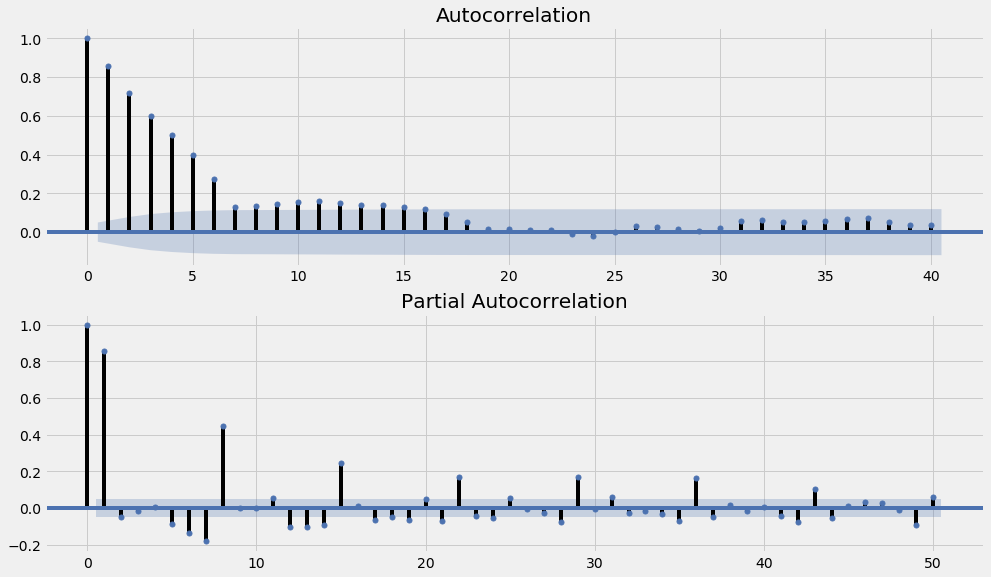

In [90]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure()
pyplot.subplot(211)
plot_acf(ts_diff_logtrans, ax=pyplot.gca(),lags=40)
pyplot.subplot(212)
plot_pacf(ts_diff_logtrans, ax=pyplot.gca(), lags=50)
pyplot.show()

# Modelling

# AR Model

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


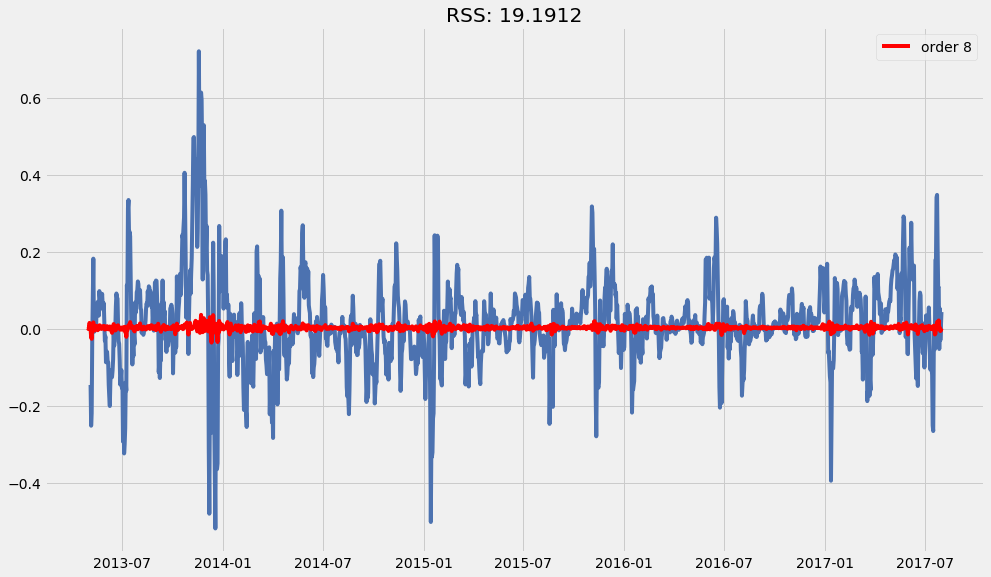

In [91]:
model = ARIMA(ts_logtransformed, order=(8, 1, 0))  
results_AR = model.fit(disp=-1)  

plt.plot(ts_diff_logtrans)
plt.plot(results_AR.fittedvalues, color='red', label = 'order 8')

RSS = results_AR.fittedvalues-ts_diff_logtrans
RSS.dropna(inplace=True)

plt.title('RSS: %.4f'% sum(RSS**2))
plt.legend(loc = 'best')
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


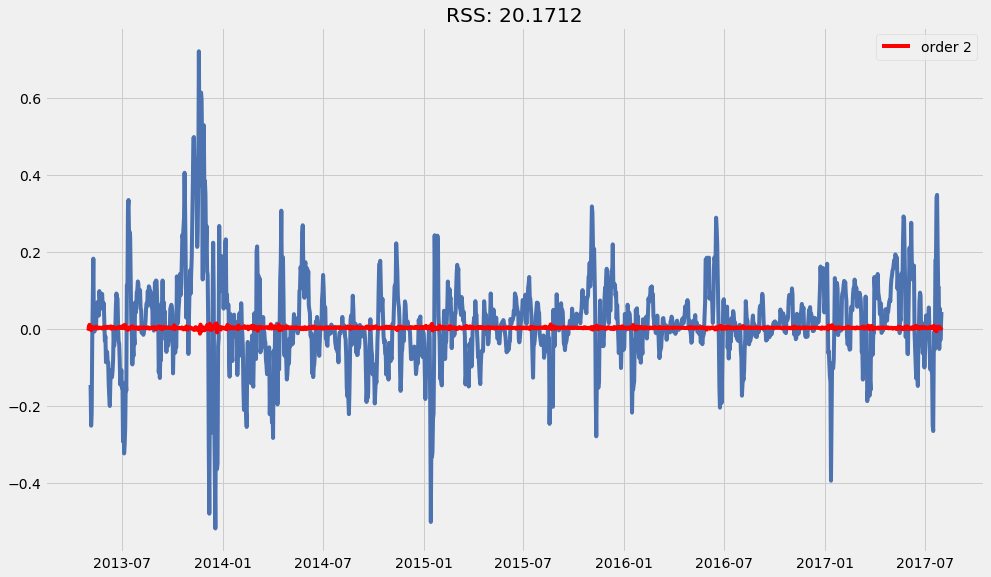

In [92]:
model = ARIMA(ts_logtransformed, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_diff_logtrans)
plt.plot(results_AR.fittedvalues, color='red', label = 'order 2')
RSS = results_AR.fittedvalues-ts_diff_logtrans
RSS.dropna(inplace=True)
plt.title('RSS: %.4f'% sum(RSS**2))
plt.legend(loc ='best')
plt.show()

In [93]:
print(results_AR.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1555
Model:                 ARIMA(2, 1, 0)   Log Likelihood                2704.690
Method:                       css-mle   S.D. of innovations              0.042
Date:                Tue, 28 Apr 2020   AIC                          -5401.380
Time:                        22:48:30   BIC                          -5379.984
Sample:                    04-29-2013   HQIC                         -5393.424
                         - 07-31-2017                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0020      0.001      1.908      0.056   -5.37e-05       0.004
ar.L1.D.Close    -0.0011      0.025     -0.044      0.965      -0.051       0.049
ar.L2.D.Close    -0.0435      0.025     

# MA Model

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


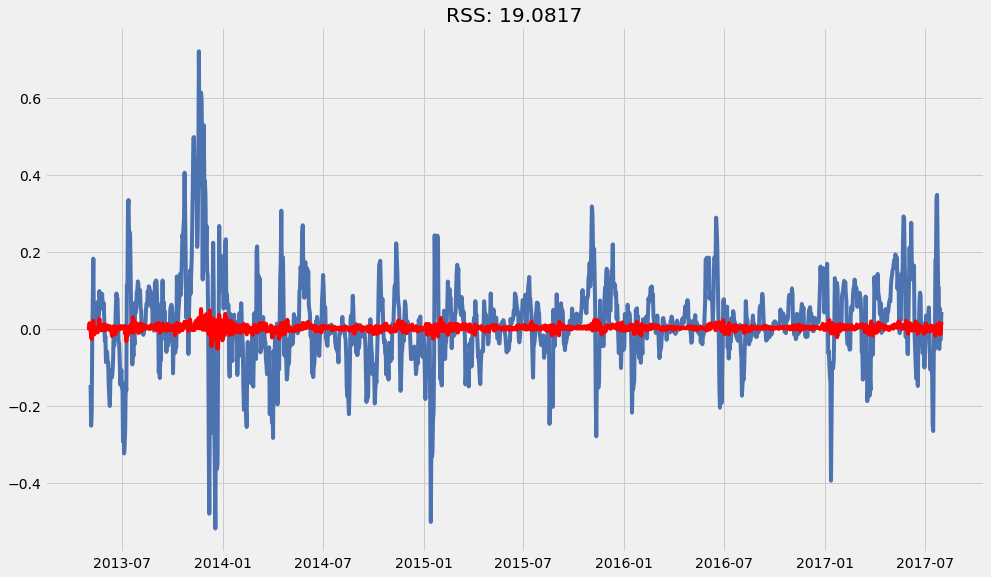

In [94]:
model = ARIMA(ts_logtransformed, order=(0, 1,18)) 
results_MA = model.fit(disp=-1)  

plt.plot(ts_diff_logtrans)
plt.plot(results_MA.fittedvalues, color='red')

RSS = results_MA.fittedvalues-ts_diff_logtrans
RSS.dropna(inplace=True)

plt.title('RSS: %.4f'% sum(RSS**2))
plt.show()

In [95]:
print(results_MA.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1555
Model:                ARIMA(0, 1, 18)   Log Likelihood                2727.323
Method:                       css-mle   S.D. of innovations              0.042
Date:                Tue, 28 Apr 2020   AIC                          -5414.646
Time:                        22:49:20   BIC                          -5307.661
Sample:                    04-29-2013   HQIC                         -5374.862
                         - 07-31-2017                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0019      0.001      1.374      0.169      -0.001       0.005
ma.L1.D.Close     -0.0100      0.026     -0.390      0.697      -0.060       0.040
ma.L2.D.Close     -0.0373      0.025

#  ARIMA Combined Model

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


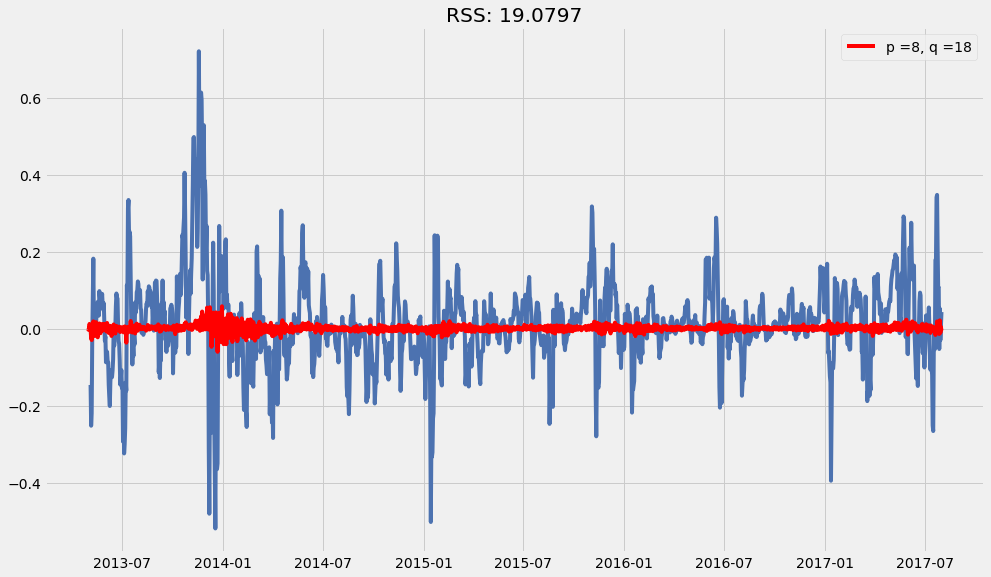

In [99]:
model = ARIMA(ts_logtransformed, order=(5, 1, 10))  
results_ARIMA = model.fit(trend= 'nc', disp=-1) 

plt.plot(ts_diff_logtrans)
plt.plot(results_ARIMA.fittedvalues, color='red', label = 'p =8, q =18')

RSS =results_ARIMA.fittedvalues-ts_diff_logtrans
RSS.dropna(inplace=True)

plt.title('RSS: %.4f'% sum(RSS**2))
plt.legend(loc='best')
plt.show()

In [100]:
print(results_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1555
Model:                ARIMA(5, 1, 10)   Log Likelihood                2733.476
Method:                       css-mle   S.D. of innovations              0.042
Date:                Tue, 28 Apr 2020   AIC                          -5434.953
Time:                        22:59:52   BIC                          -5349.365
Sample:                    04-29-2013   HQIC                         -5403.125
                         - 07-31-2017                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
ar.L1.D.Close     -0.1370      0.054     -2.549      0.011      -0.242      -0.032
ar.L2.D.Close      0.4303      0.059      7.325      0.000       0.315       0.545
ar.L3.D.Close     -0.5120      0.044

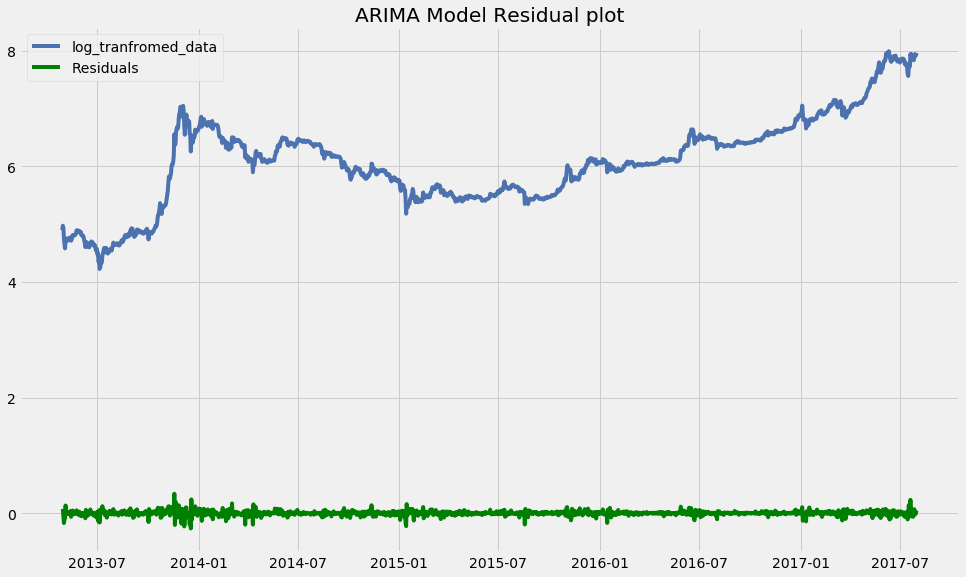

In [101]:
plt.plot(ts_logtransformed, label = 'log_tranfromed_data')
plt.plot(results_ARIMA.resid, color ='green',label= 'Residuals')
plt.title('ARIMA Model Residual plot')
plt.legend(loc = 'best')
plt.show()


count    1555.000000
mean        0.001366
std         0.041725
min        -0.263188
25%        -0.012271
50%         0.001658
75%         0.017305
max         0.336401
dtype: float64


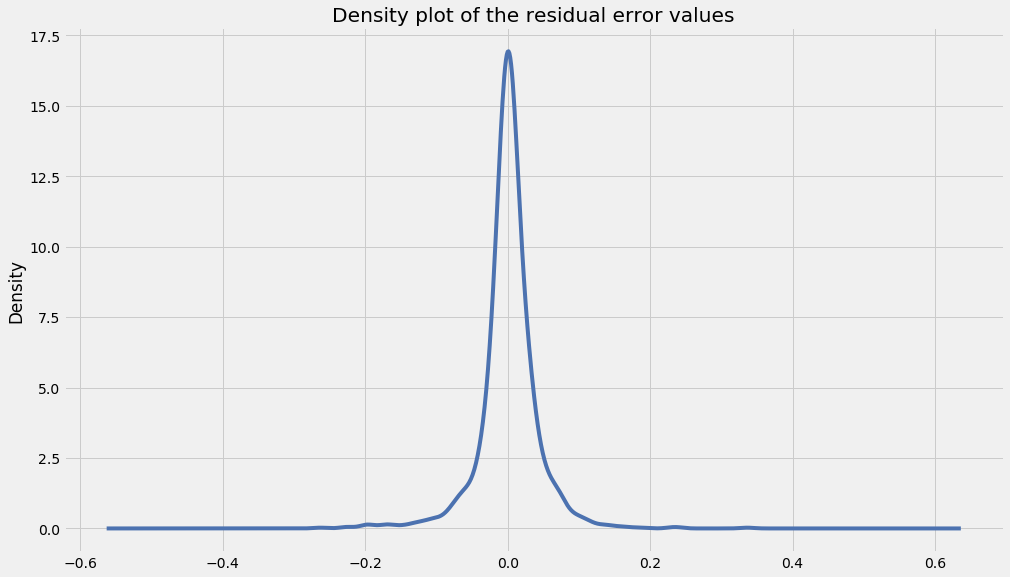

In [102]:
results_ARIMA.resid.plot(kind='kde')
plt.title('Density plot of the residual error values')
print(results_ARIMA.resid.describe())

In [104]:
test = pd.read_csv("E:\Downlload\Bitcoin-Price-Prediction-master\Test.csv",index_col= 'Date')
test.index = pd.to_datetime(test.index)
test = test['Close']
test = test.sort_index()
test

Date
2017-08-01    2718.26
2017-08-02    2710.67
2017-08-03    2804.73
2017-08-04    2895.89
2017-08-05    3252.91
2017-08-06    3213.94
2017-08-07    3378.94
Name: Close, dtype: float64

In [108]:
pred_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(pred_ARIMA_diff.head())

Date
2013-04-29    0.000000
2013-04-30    0.000081
2013-05-01   -0.003095
2013-05-02    0.000316
2013-05-03    0.011975
dtype: float64


In [109]:
pred_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(pred_ARIMA_diff_cumsum.head())

Date
2013-04-29    0.000000
2013-04-30    0.000081
2013-05-01   -0.003014
2013-05-02   -0.002698
2013-05-03    0.009277
dtype: float64


In [110]:
predictions_ARIMA_log = pd.Series(ts_logtransformed.iloc[0], index=ts_logtransformed.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Date
2013-04-28    4.899406
2013-04-29    4.899406
2013-04-30    4.899487
2013-05-01    4.896391
2013-05-02    4.896708
dtype: float64

In [111]:
from sklearn.metrics import mean_squared_error

dates = [pd.Timestamp('2017-08-01'), pd.Timestamp('2017-08-02'), 
         pd.Timestamp('2017-08-03'),pd.Timestamp('2017-08-04'), 
         pd.Timestamp('2017-08-05'), pd.Timestamp('2017-08-06'), 
         pd.Timestamp('2017-08-07')]

forecast = pd.Series(results_ARIMA.forecast(steps=7)[0],dates)
forecast = np.exp(forecast)
print(forecast)
error = mean_squared_error(test, forecast)
print('Test MSE: %.3f' % error)

2017-08-01    2864.380659
2017-08-02    2908.281386
2017-08-03    2905.272262
2017-08-04    2948.639515
2017-08-05    2895.635973
2017-08-06    2927.965343
2017-08-07    2916.843795
dtype: float64
Test MSE: 70893.129


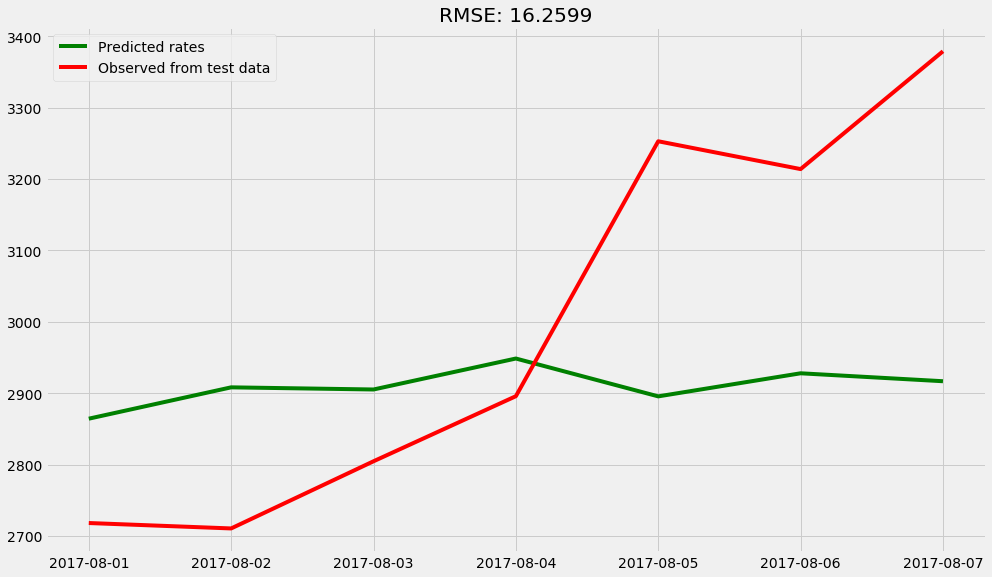

In [112]:
plt.plot(forecast, color ='green', label ='Predicted rates')
plt.plot(test, color = 'red', label = 'Observed from test data')
plt.title('RMSE: %.4f'% np.sqrt(sum((forecast-test)**2)/len(data)))
plt.legend(loc = 'best')